- Download
- Load
- Visualise
- Normalisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx = pd.read_csv('./train/Linear_X_Train.csv')
dfy = pd.read_csv('./train/Linear_Y_Train.csv')

print(dfx.shape)
print(dfy.shape)

(3750, 1)
(3750, 1)


In [3]:
dfx.head(n = 10)


,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043
5,-1.675230
6,-0.746080
7,1.979400
8,0.766941
9,-0.605719


In [4]:
dfy.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [5]:
X = dfx.values
y = dfy.values

In [6]:
print(X.shape)
print(y.shape)

print(X)
print(y)

(3750, 1)
(3750, 1)
[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


## Visualisation

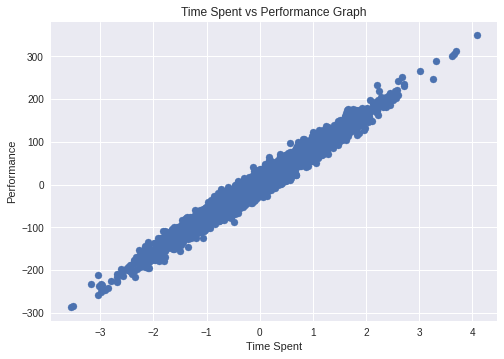

In [7]:
plt.style.use("seaborn")
plt.scatter(X, y)
plt.title("Time Spent vs Performance Graph")
plt.xlabel("Time Spent")
plt.ylabel("Performance")
plt.show()

Clearly, the problem can be solved using linear regression.

## Normalisation

In [8]:
u = X.mean()
std = X.std()

In [9]:
print(u)
print(std)

-0.03779466168006855
0.9920801322508517


Since std is close to 1, data is already normalised.

In [49]:
X = (X - u) / std

In [50]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

# Linear Regression

Only for single feature problems

In [51]:
def hypothesis(x, theta) :
    # theta = [theta0, theta1]
    y_ = theta[0] + theta[1] * x
    return y_

In [52]:
def gradient(X, Y, theta) :
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m) :
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
    return grad / m

In [53]:
def error(X, Y, theta) :
    m = X.shape[0]
    total_error = 0.0
    for i in range(m) :
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        total_error += (y_ - y) ** 2
    return total_error / (m)

In [54]:
def gradientDescent(X, Y, max_steps = 100,learning_rate = 0.1) :
    theta = np.zeros((2, ))
    error_list = []
    for i in range(max_steps) :
        x = X[i]
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    return theta, error_list

In [55]:
theta, error_list = gradientDescent(X, y)

In [57]:
print(theta)

[ 0.6838508  79.90361453]


In [58]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

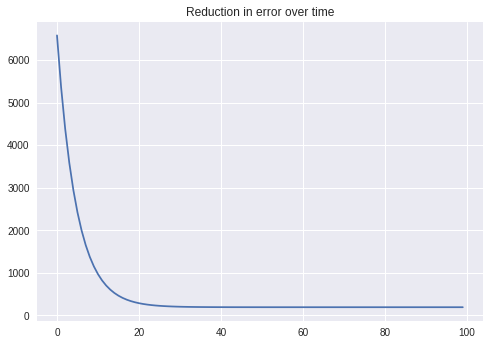

In [60]:
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

## Predcitions and Best Line

y_ = theta[0] + theta[1] * X

In [72]:
y_ = hypothesis(X, theta)

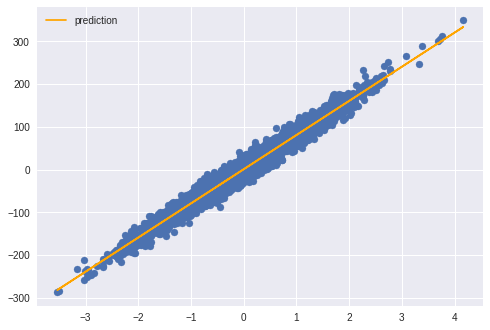

In [83]:
plt.scatter(X, y)
plt.plot(X, y_, color = 'orange', label = 'prediction')
plt.legend()
plt.show()

In [84]:
df_test = pd.read_csv('./test/Linear_X_Test.csv')
print(df_test.shape)

(1250, 1)


In [85]:
X_test = df_test.values

In [86]:
Y_test = hypothesis(X_test, theta)

In [87]:
print(Y_test)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


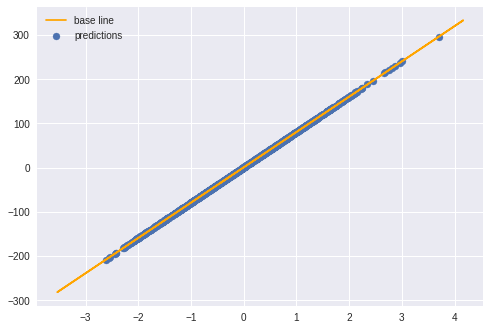

In [94]:
plt.scatter(X_test, Y_test, label = 'predictions')
plt.plot(X, y_, color = 'orange', label = 'base line')
plt.legend()
plt.show()

In [89]:
test_df = pd.DataFrame(data = Y_test, columns = ['y'])

In [90]:
test_df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [95]:
test_df.to_csv('y_prediction.csv', index = False)

## Computing Score (on training data)
**Score:** R2 (R-squared) or Coefficient of Determination

In [96]:
def r2_score(Y, y_) :
    num = np.sum((Y - y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - (num / denom)
    return score * 100

In [98]:
print(r2_score(y, y_))

97.09612226971643
